In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO     2016-10-03 16:18:47,581 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
ncf = NCFile('/data/readout/2016-10-03_152230_mmw_source_sweep.nc',cache_s21_raw=True)

In [4]:
mmwsl = ncf.MMWSweepList0

In [5]:
df = mmwsl.to_dataframe()

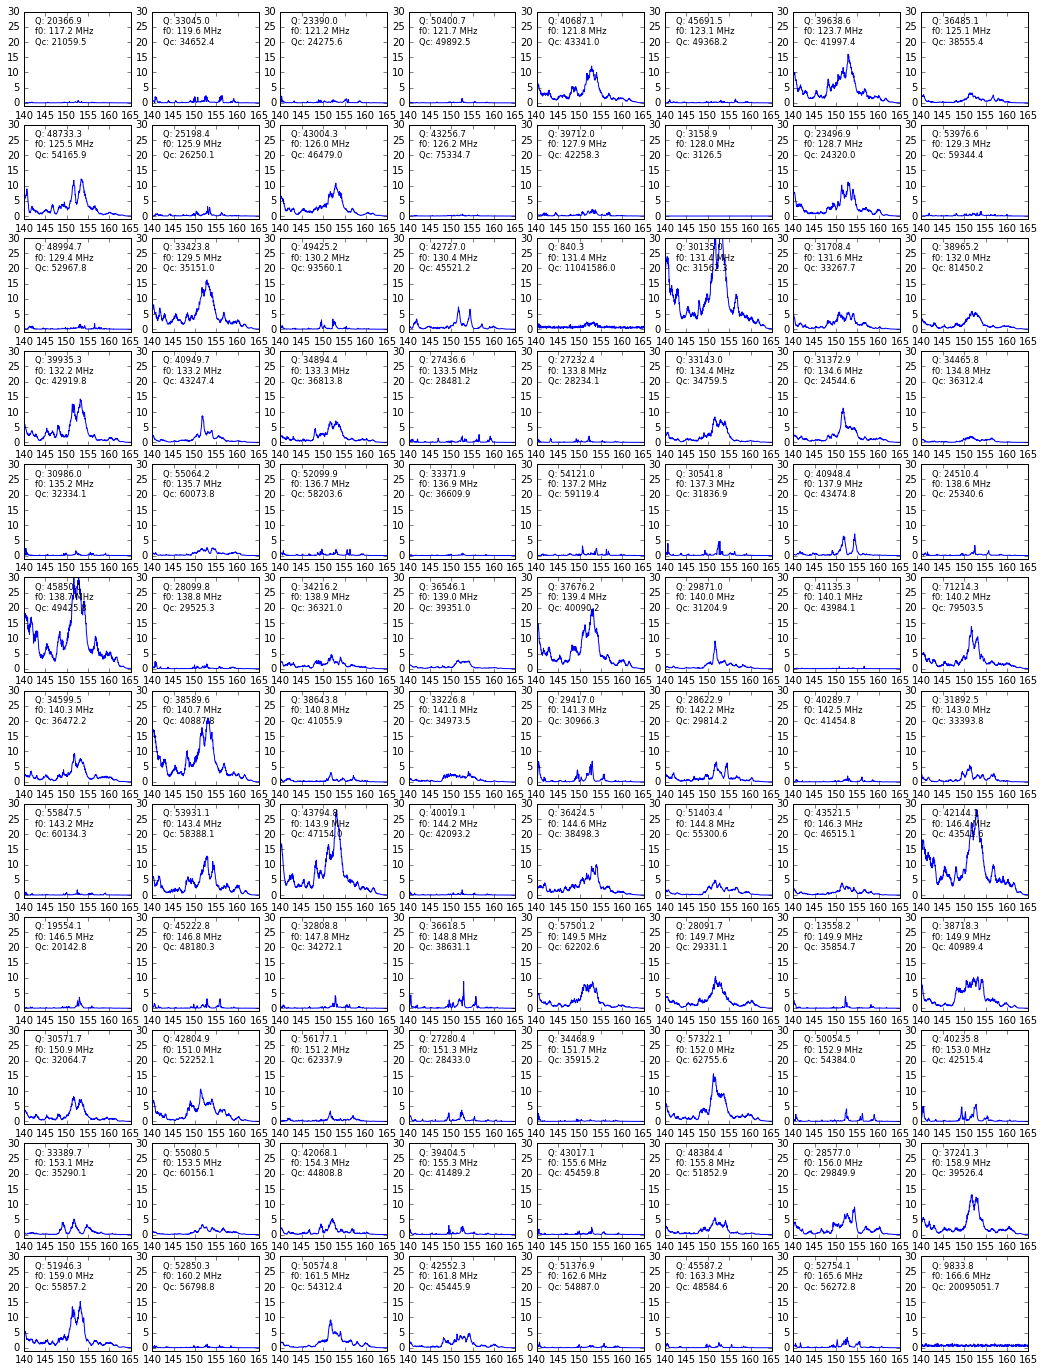

In [11]:
fig,axs = subplots(12,8,figsize=(18,24))
for k,row in df.iterrows():
    if k >=96:
        break
    ax = axs.flatten()[k]
    try:
        ax.plot(row.mmw_frequency/1e9,1e6*row.fractional_frequency_response)
        ax.text(0.1,0.95,("Q: %.1f\nf0: %.1f MHz\nQc: %.1f" %(row.res_Q,row.res_f_0/1e6,1/np.real(1/row.res_Q_e)[()])),
               transform=ax.transAxes,size='small',va='top')
    except ValueError:
        pass
    ax.set_ylim(-1,30)

In [20]:
154.5e9/12.

12875000000.0

(0.01, 50)

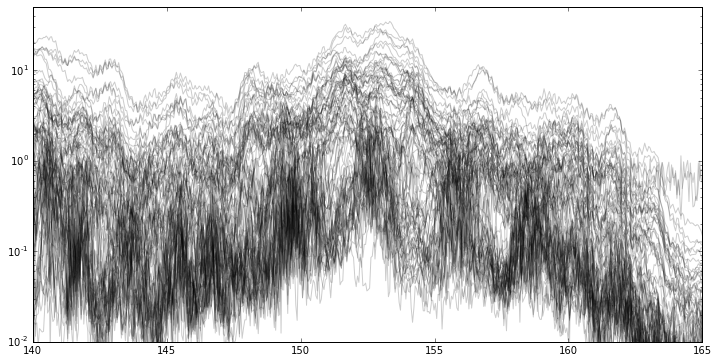

In [15]:
figure(figsize=(12,6))
for k,row in df.iterrows():
    if k > 95:
        break
    try:
        semilogy(row.mmw_frequency/1e9,1e6*row.fractional_frequency_response,'k',alpha=.2)
    except ValueError:
        pass
xlim(140,165)
ylim(.01,50)

13
20
95
93


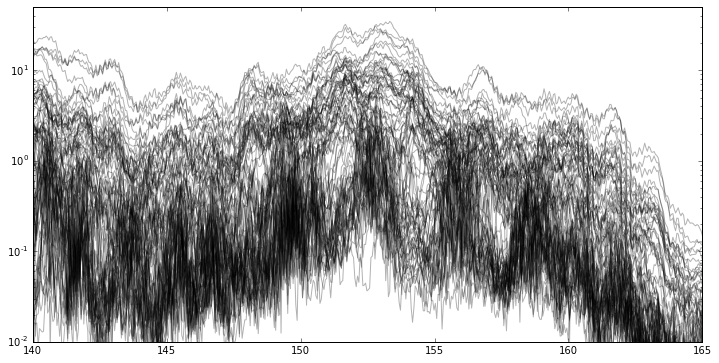

In [16]:
figure(figsize=(12,6))
num_alive = 0
for k,row in df.iterrows():
    if k > 95:
        break
    if 1e6*np.sum(row.fractional_frequency_response)/np.sum(1e6*row.fractional_frequency_response[-20:]) > 200:
        semilogy(row.mmw_frequency/1e9,1e6*row.fractional_frequency_response,'k',alpha=.3)
        num_alive +=1
    else:
        print k
xlim(140,165)
ylim(.01,50)
print num_alive

In [7]:
ss = mmwsl.single_sweep_stream_list(58)

In [9]:
ss.folded_x.shape

(500, 128)

In [10]:
f1 = ss.sweep_stream_list[0].fold(ss.sweep_stream_list[0].x)

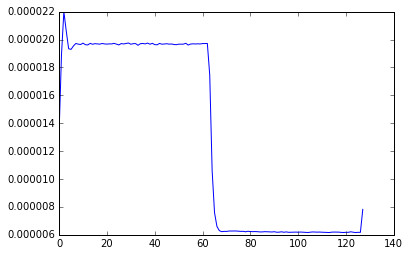

In [47]:
plot(np.roll(f1,-35+32))

In [35]:
ph =(np.fft.rfft(f1))

In [42]:
128*(np.angle(ph[1])/(2*np.pi))

-34.806846275118943

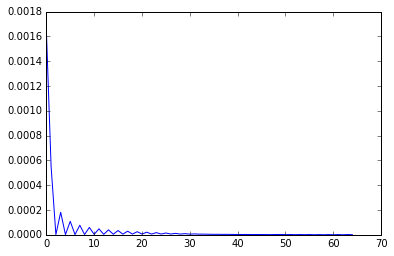

In [36]:
plot(np.abs(ph))

In [32]:
np.angle(ph[32])

-1.7085770683210892

In [34]:
np.abs(ph[1:]).argmax()

31

(0, 256)

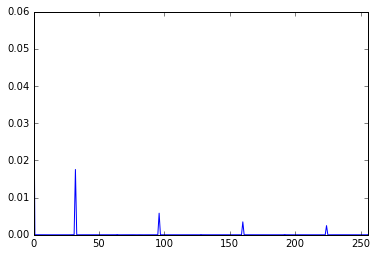

In [30]:
plot(np.abs(ph))
xlim(0,256)

In [27]:
ph[128]

-1.6358671491902668

In [ ]:
p

In [25]:
ss.folded_x.shape

(500, 128)

In [24]:
ph[128]

IndexError: index 128 is out of bounds for axis 0 with size 65

In [11]:
sss = ss.sweep_stream_list[0]

In [35]:
sss.fold??

In [12]:
sss.stream.roach_state

StateDict({u'boffile': u'r2bb2xpfb14mcr25_2016_Oct_01_2233.bof', u'modulation_output': 2, u'modulation_rate': 7, u'fft_shift_register': 1048560, u'num_tone_samples': 262144, u'bank': 0, u'num_filterbank_channels': 16384, u'loopback': False, u'lo_frequency': 0.0, u'adc_sample_rate': 512000000.0, u'waveform_normalization': 0.000396728515625, u'hardware_delay_samples': -32409.599999999999, u'num_tones': 128, u'debug_register': 0, u'reference_sequence_number': 4266701162, u'dac_attenuation': 20.0, u'heterodyne': False})

In [13]:
from kid_readout.roach import calculate
reload(calculate)

<module 'kid_readout.roach.calculate' from '/home/gjones/kid_readout/kid_readout/roach/calculate.pyc'>

In [14]:
calculate.modulation_period_samples(sss.stream.roach_state)

128

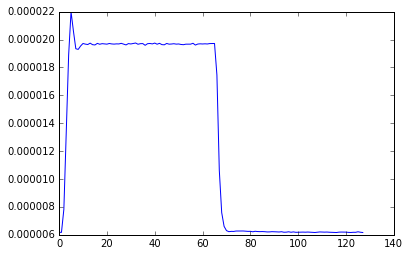

In [15]:
plot(ss.sweep_stream_list[0].fold(ss.sweep_stream_list[0].x))

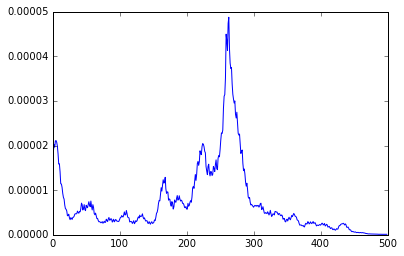

In [8]:
plot(ss.folded_x.ptp(1))

In [11]:
ss.folded_x.shape

(500, 128)

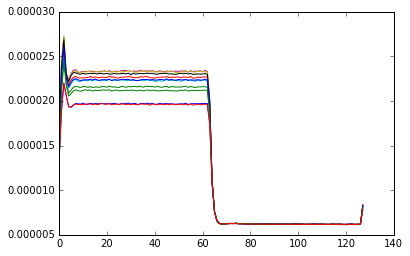

In [8]:
plot(ss.folded_x[:10].T)

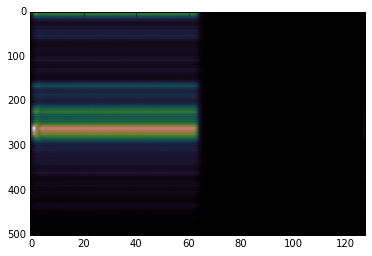

In [9]:
imshow(ss.folded_x,aspect='auto',cmap=cm.cubehelix)